## Importing the dataset Iris Flower Classification from their official website

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

## Importing Required Libraries

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt

Combine features and targets for plotting

In [4]:
df = X.copy()
df['class'] = y['class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking for null values and defining dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [8]:
print(X.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
dtype: object


## Ploting graph

 Scatter plot of sepal length vs sepal width, colored by class

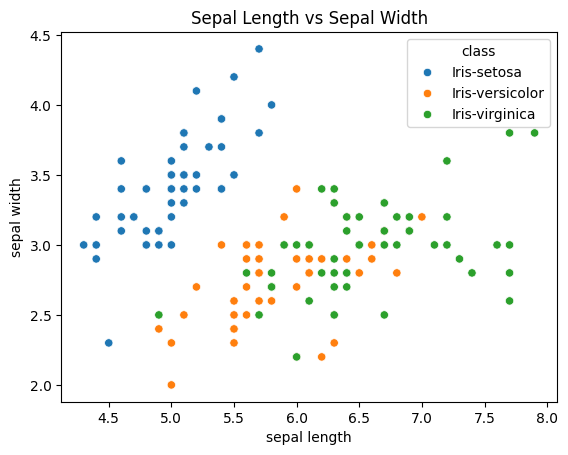

In [9]:
sns.scatterplot(data=df, x='sepal length', y='sepal width', hue='class')
plt.title('Sepal Length vs Sepal Width')
plt.show()

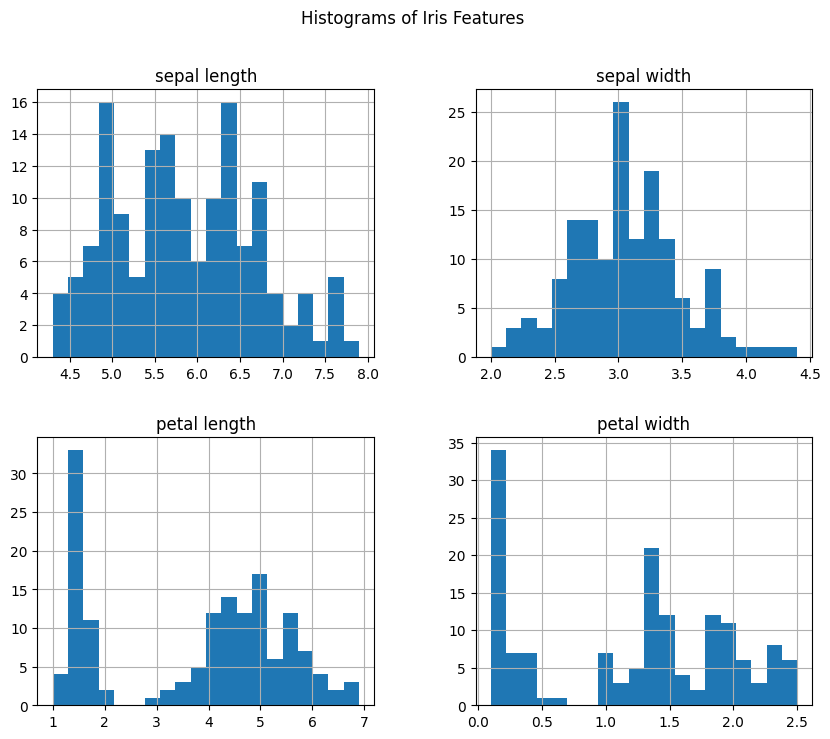

In [10]:
df.drop('class', axis=1).hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms of Iris Features')
plt.show()

### Creating test and train data 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Create and train the Logistic Regression model

In [12]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

#### Ploting the graph of prediction data

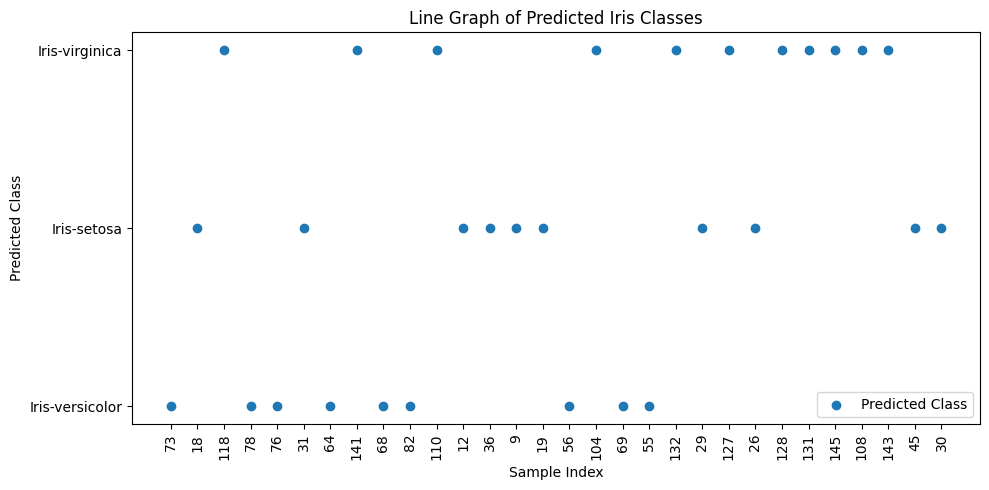

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_pred)), y_pred, marker='o', linestyle='-', label='Predicted Class')
plt.xticks(range(len(y_pred)), X_test.index, rotation=90)
plt.xlabel('Sample Index')
plt.ylabel('Predicted Class')
plt.title('Line Graph of Predicted Iris Classes')
plt.legend()
plt.tight_layout()
plt.show()

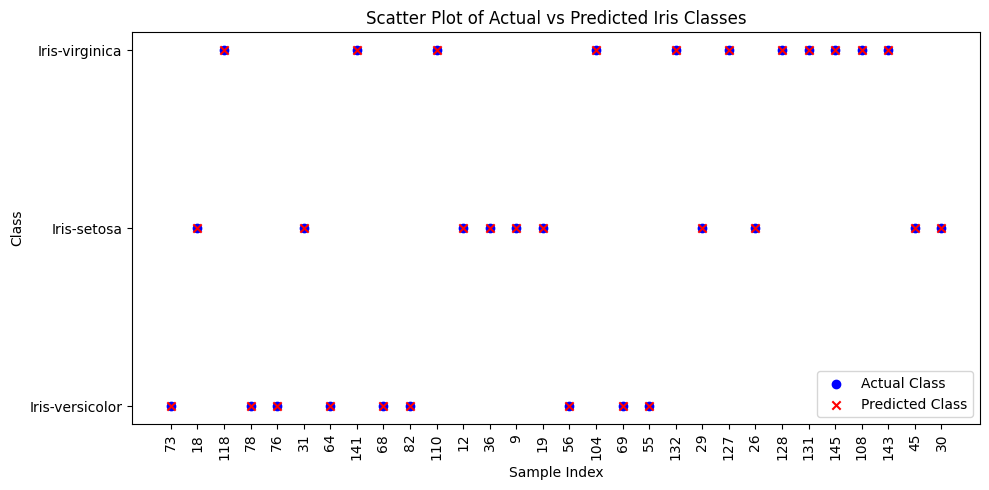

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test['class'], marker='o', color='blue', label='Actual Class')
plt.scatter(range(len(y_pred)), y_pred, marker='x', color='red', label='Predicted Class')
plt.xticks(range(len(y_test)), X_test.index, rotation=90)
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Scatter Plot of Actual vs Predicted Iris Classes')
plt.legend()
plt.tight_layout()
plt.show()

#### Acuracy score of prediction

In [16]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test['class'], y_pred)
print(f"Accuracy: {lr_accuracy:.2f}")

Accuracy: 1.00


#### Precision and confusion matrix for lenear regression

In [17]:
from sklearn.metrics import precision_score, confusion_matrix

lr_cm = confusion_matrix(y_test['class'], y_pred)
print("Logistic Regression Confusion Matrix:\n", lr_cm)

lr_precision = precision_score(y_test['class'], y_pred, average='macro')
print(f"Logistic Regression Precision (macro): {lr_precision:.2f}")

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Logistic Regression Precision (macro): 1.00


#### Example: Predict the class for a new sample

In [18]:

sample = [[5.1, 3.5, 1.4, 0.2]]  # [sepal length, sepal width, petal length, petal width]

predicted_class = model.predict(sample)
print(f"Predicted class: {predicted_class[0]}")

Predicted class: Iris-setosa


c:\Users\sahud\anaconda3\envs\Machinelearning_project\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## K-Nearest Neighbors Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train.values.ravel())

knn_y_pred = knn_model.predict(X_test)


In [20]:
knn_y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [21]:
knn_accuracy = accuracy_score(y_test['class'], knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 1.00


In [22]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # [sepal length, sepal width, petal length, petal width]
knn_predicted_class = knn_model.predict(sample)
print(f"KNN Predicted class: {knn_predicted_class[0]}")

KNN Predicted class: Iris-setosa


c:\Users\sahud\anaconda3\envs\Machinelearning_project\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### precision and confusion matrix for KNN 

In [23]:
knn_cm = confusion_matrix(y_test['class'], knn_y_pred)
print("KNN Confusion Matrix:\n", knn_cm)

knn_precision = precision_score(y_test['class'], knn_y_pred, average='macro')
print(f"KNN Precision (macro): {knn_precision:.2f}")

KNN Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
KNN Precision (macro): 1.00


## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train.values.ravel())

dt_y_pred = dt_model.predict(X_test)

In [25]:
dt_y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [26]:
dt_accuracy = accuracy_score(y_test['class'], dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 1.00


#### Predict the class for a new sample using the Decision Tree model

In [27]:
sample = [[5.1, 3.5, 1.4, 0.2]]  # [sepal length, sepal width, petal length, petal width]
dt_predicted_class = dt_model.predict(sample)
print(f"Decision Tree Predicted class: {dt_predicted_class[0]}")

Decision Tree Predicted class: Iris-setosa


c:\Users\sahud\anaconda3\envs\Machinelearning_project\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#### precision and confusion matrix for decision tree


In [28]:
dt_cm = confusion_matrix(y_test['class'], dt_y_pred)
print("Decision Tree Confusion Matrix:\n", dt_cm)


dt_precision = precision_score(y_test['class'], dt_y_pred, average='macro')
print(f"Decision Tree Precision (macro): {dt_precision:.2f}")

Decision Tree Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision Tree Precision (macro): 1.00
